In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.mlab import PCA as mlabPCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
sns.set_style("whitegrid")

hate = pd.read_csv('/Users/ezzan/Downloads/hate_crimes.csv')
hate = hate[hate.state != 'District of Columbia']

In [100]:
hate.head(10)


,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986
5,Colorado,60940,0.040,0.80,0.893,0.06,0.07,0.457,0.31,0.44,0.390523,2.804689
6,Connecticut,70161,0.052,0.94,0.886,0.06,0.06,0.486,0.30,0.41,0.335392,3.772701
7,Delaware,57522,0.049,0.90,0.874,0.05,0.08,0.440,0.37,0.42,0.322754,1.469980
9,Florida,46140,0.052,0.96,0.853,0.09,0.11,0.474,0.46,0.49,0.187521,0.698070
10,Georgia,49555,0.058,0.82,0.839,0.08,0.09,0.468,0.48,0.51,0.120420,0.412012


In [69]:
for col in hate.columns:
    print(hate[col].describe())

count            51
unique           51
top       Louisiana
freq              1
Name: state, dtype: object
count       51.000000
mean     55223.607843
std       9208.478170
min      35521.000000
25%      48657.000000
50%      54916.000000
75%      60719.000000
max      76165.000000
Name: median_household_income, dtype: float64
count    51.000000
mean      0.049569
std       0.010698
min       0.028000
25%       0.042000
50%       0.051000
75%       0.057500
max       0.073000
Name: share_unemployed_seasonal, dtype: float64
count    51.000000
mean      0.750196
std       0.181587
min       0.310000
25%       0.630000
50%       0.790000
75%       0.895000
max       1.000000
Name: share_population_in_metro_areas, dtype: float64
count    51.000000
mean      0.869118
std       0.034073
min       0.799000
25%       0.840500
50%       0.874000
75%       0.898000
max       0.918000
Name: share_population_with_high_school_degree, dtype: float64
count    48.000000
mean      0.054583
std       0.

In [70]:
df_jittered = hate.loc[:, 'median_household_income':'hate_crimes_per_100k_splc']

jitter = pd.DataFrame(
    np.random.uniform(0, 1, size=(df_jittered.shape)),
    columns=df_jittered.columns
)

df_jittered = df_jittered.add(jitter)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


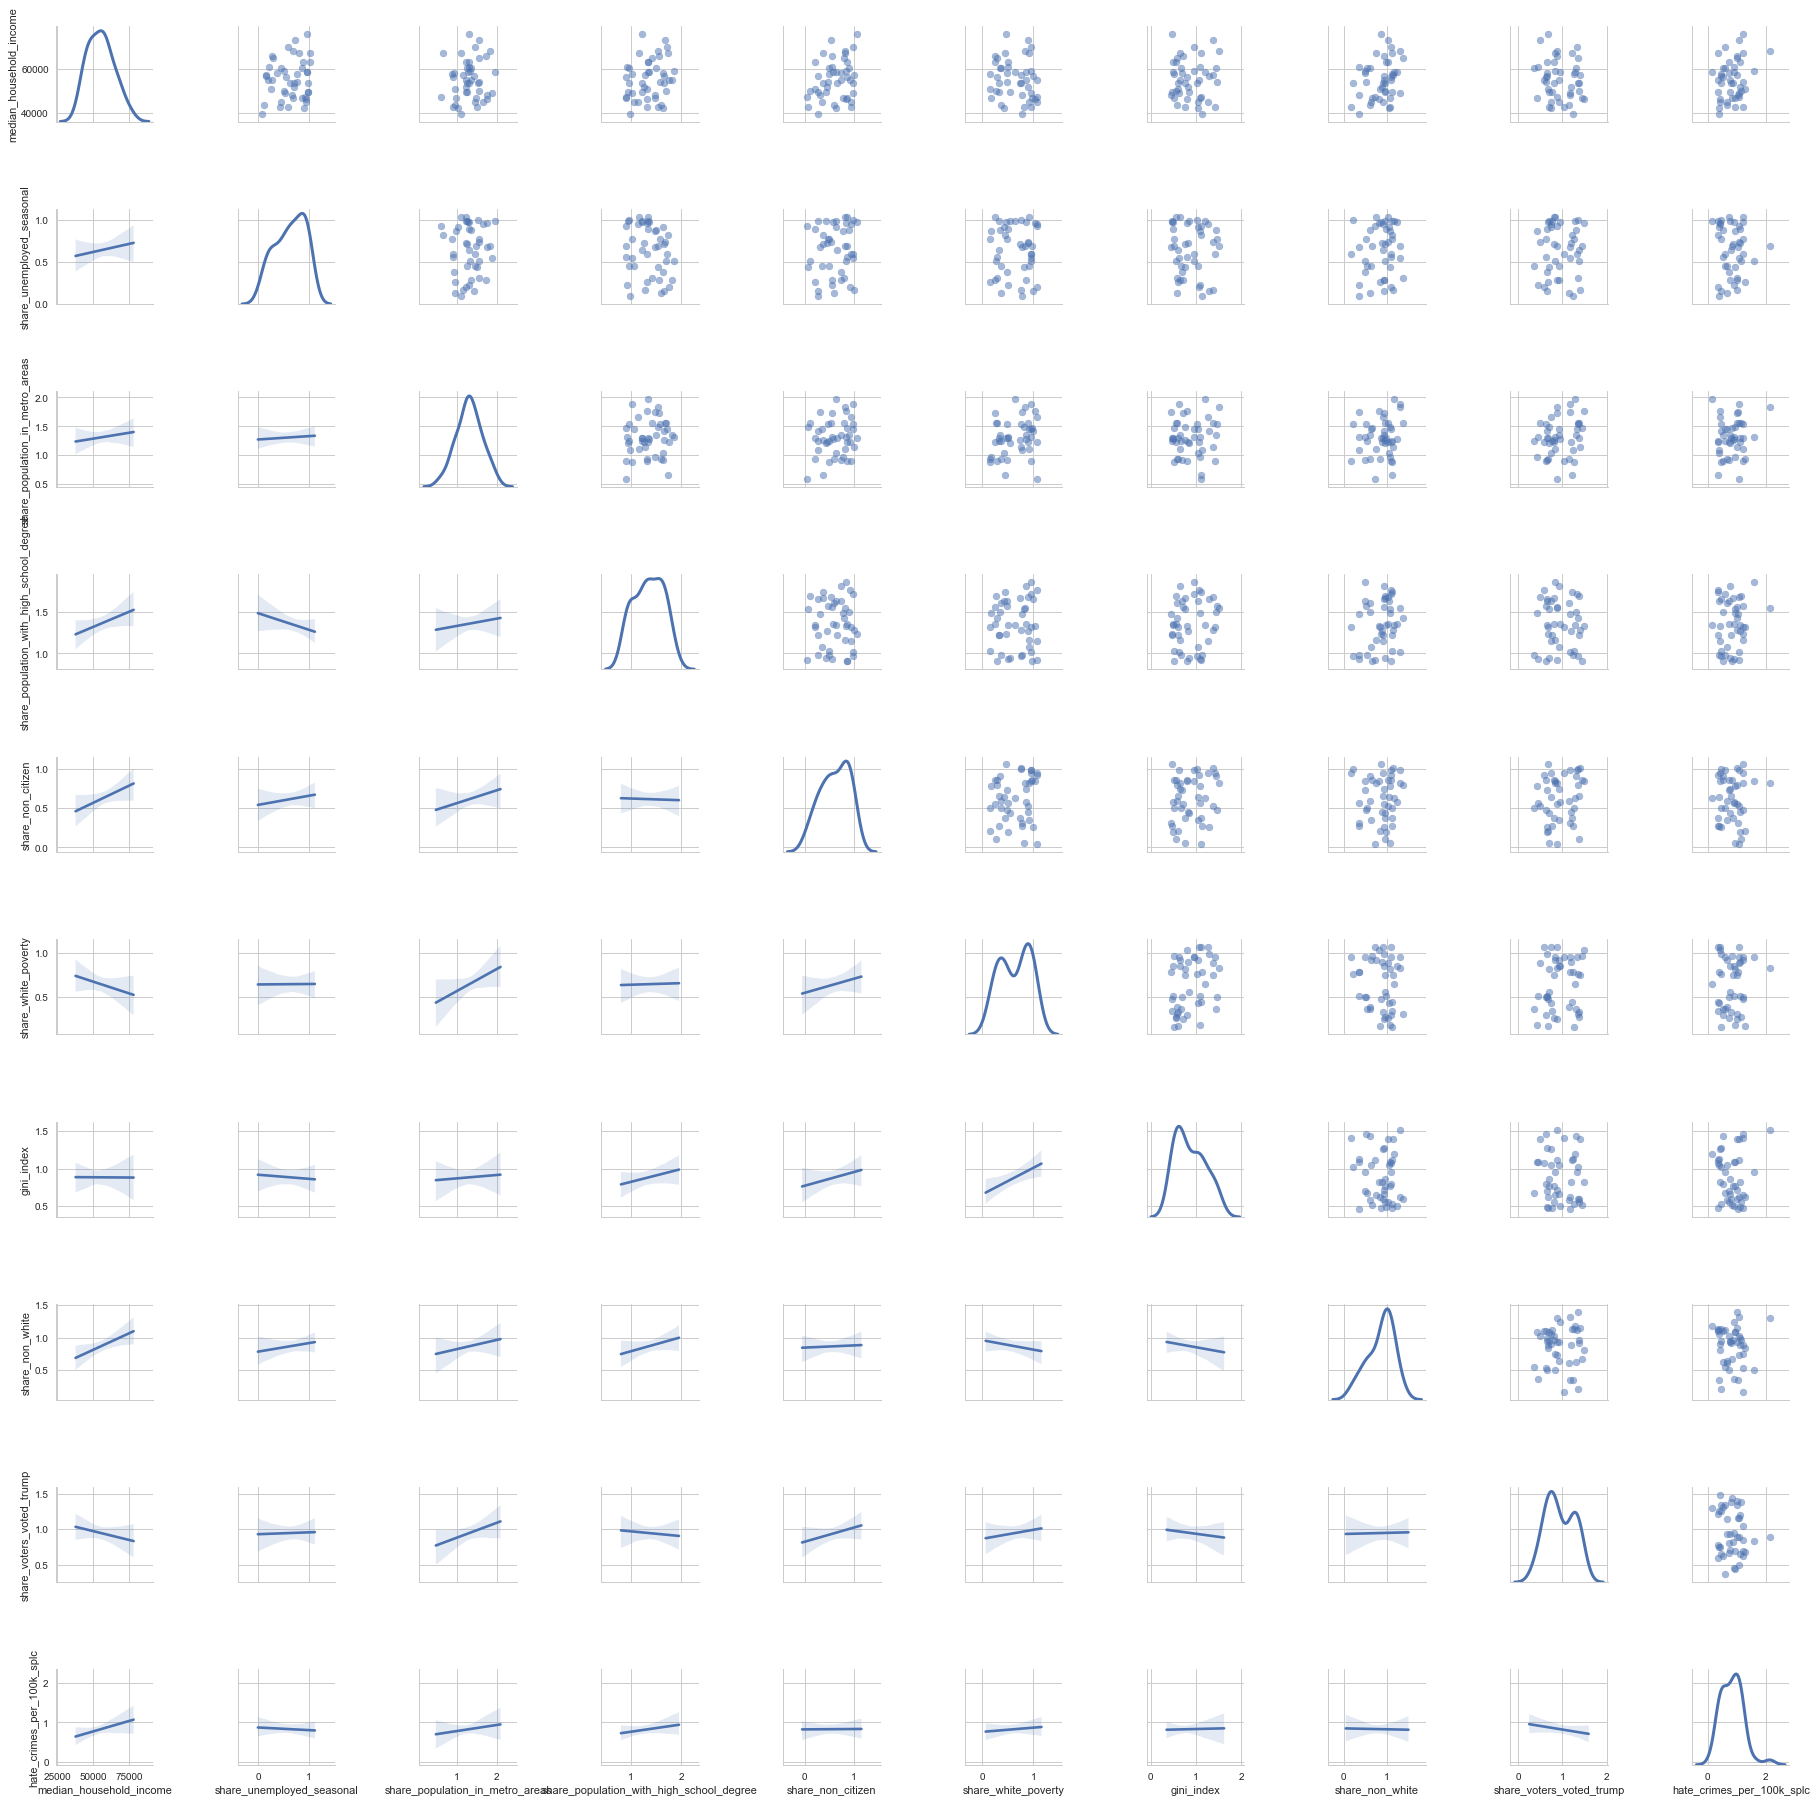

In [101]:


# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()


                                          median_household_income  \
median_household_income                                  1.000000   
share_unemployed_seasonal                               -0.376722   
share_population_in_metro_areas                          0.286480   
share_population_with_high_school_degree                 0.653490   
share_non_citizen                                        0.302288   
share_white_poverty                                     -0.818045   
gini_index                                              -0.178821   
share_non_white                                          0.103775   
share_voters_voted_trump                                -0.597528   
hate_crimes_per_100k_splc                                0.350714   
avg_hatecrimes_per_100k_fbi                              0.318246   

                                          share_unemployed_seasonal  \
median_household_income                                   -0.376722   
share_unemployed_seasonal    

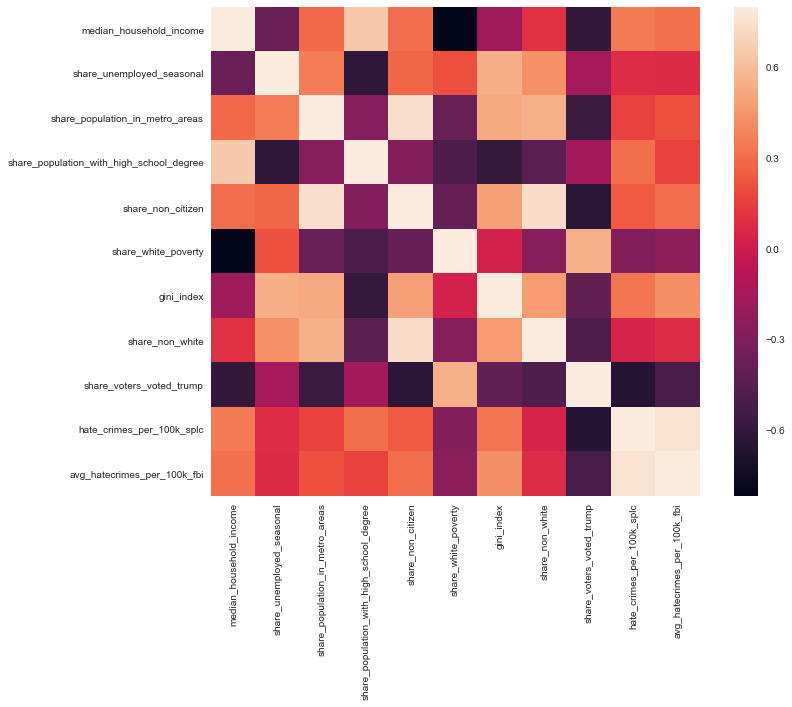

In [72]:

corrmat = hate.corr()
print(corrmat)
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


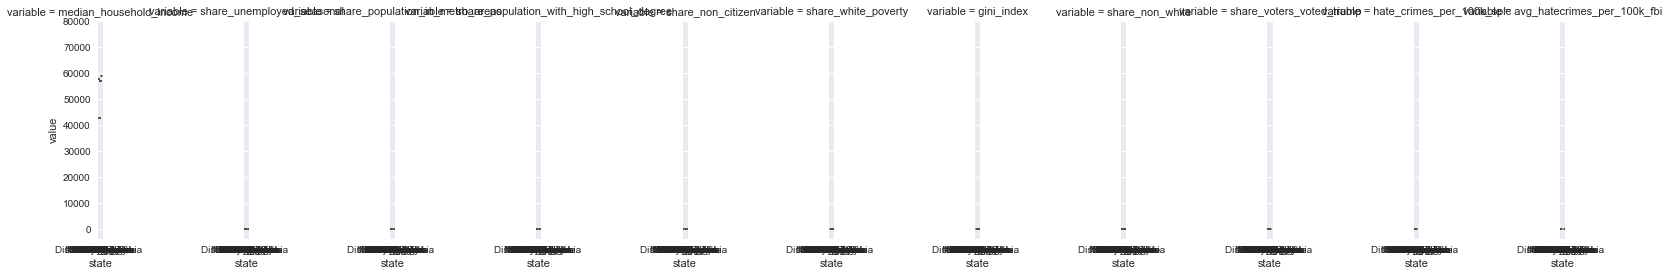

                     avg_hatecrimes_per_100k_fbi                            \
                                           count       mean std        min   
state                                                                        
Alabama                                      1.0   1.806410 NaN   1.806410   
Alaska                                       1.0   1.656700 NaN   1.656700   
Arizona                                      1.0   3.413928 NaN   3.413928   
Arkansas                                     1.0   0.869209 NaN   0.869209   
California                                   1.0   2.397986 NaN   2.397986   
Colorado                                     1.0   2.804689 NaN   2.804689   
Connecticut                                  1.0   3.772701 NaN   3.772701   
Delaware                                     1.0   1.469980 NaN   1.469980   
District of Columbia                         1.0  10.953480 NaN  10.953480   
Florida                                      1.0   0.698070 NaN 

c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [73]:
# Plot all the variables with boxplots for each country.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = hate
df_long = pd.melt(df_long, id_vars=['state'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "state", "value")

plt.show()

# Descriptive statistics by group.
print(hate.groupby('state').describe())

# Test whether group differences are significant.
for col in hate.loc[:,'share_unemployed_seasonal': 'share_voters_voted_trump'].columns:
    print(col)
    print(stats.ttest_ind(
        hate[hate['state'] == 'New York'][col].dropna(),
        hate[hate['state'] == 'California'][col].dropna()
    ))

In [110]:
income = [hate['median_household_income']]
crime_rate = [hate['hate_crimes_per_100k_splc']]

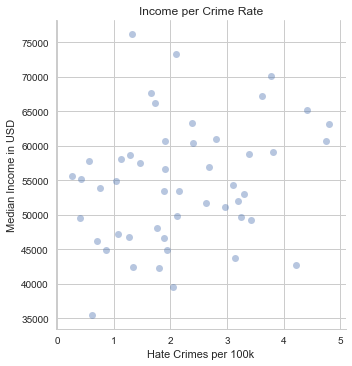

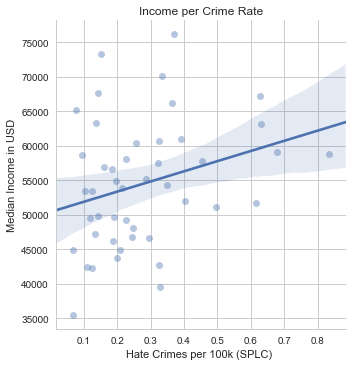

In [102]:
g = sns.lmplot(y='median_household_income', # Variable 1.
               x='avg_hatecrimes_per_100k_fbi', # Variable 2.
               data=hate, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Median Income in USD")
g.set_xlabels("Hate Crimes per 100k")
plt.title('Income per Crime Rate')

plt.show()
#seems not the most effecient indicator considering  not clear correltion and outliers


g = sns.lmplot(y='median_household_income', # Variable 1.
               x='hate_crimes_per_100k_splc',
               data=hate, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Median Income in USD")
g.set_xlabels("Hate Crimes per 100k (SPLC) ")
plt.title('Income per Crime Rate')
plt.show()

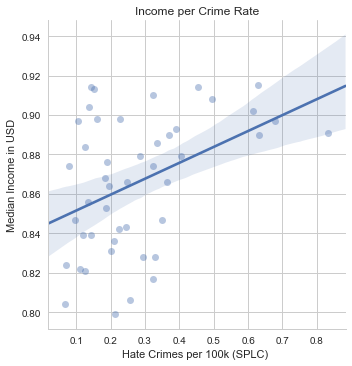

In [103]:

g = sns.lmplot(y='share_population_with_high_school_degree', # Variable 1.
               x='hate_crimes_per_100k_splc',
               data=hate, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Median Income in USD")
g.set_xlabels("Hate Crimes per 100k (SPLC) ")
plt.title('Income per Crime Rate')
plt.show()

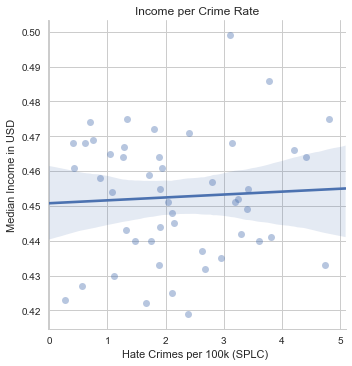

In [104]:

g = sns.lmplot(y='gini_index', # Variable 1.
               x='avg_hatecrimes_per_100k_fbi',
               data=hate, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Median Income in USD")
g.set_xlabels("Hate Crimes per 100k (SPLC) ")
plt.title('Income per Crime Rate')
plt.show()

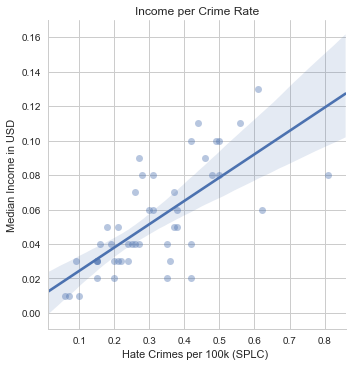

In [105]:

g = sns.lmplot(y='share_non_citizen', # Variable 1.
               x='share_non_white',
               data=hate, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Median Income in USD")
g.set_xlabels("Hate Crimes per 100k (SPLC) ")
plt.title('Income per Crime Rate')
plt.show()


In [120]:
#it apears from above data that the most postively correlated data sets are
# share pop with hs degree and share employed seasonal
# share non white and share population in metro areas
# share pop with hs degree and gini index
hate1 = hate[["state", "median_household_income", "share_unemployed_seasonal", "avg_hatecrimes_per_100k_fbi","gini_index","share_population_with_high_school_degree", "share_non_white"]]

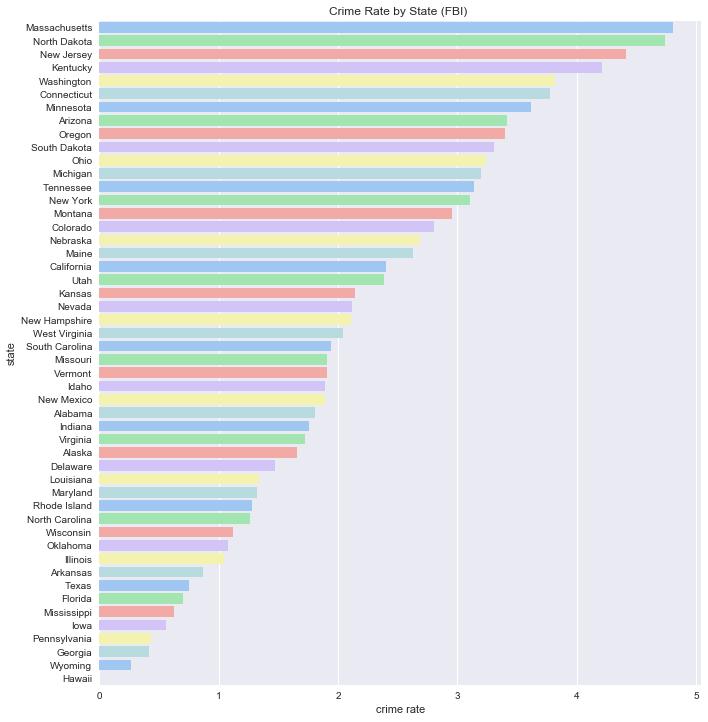

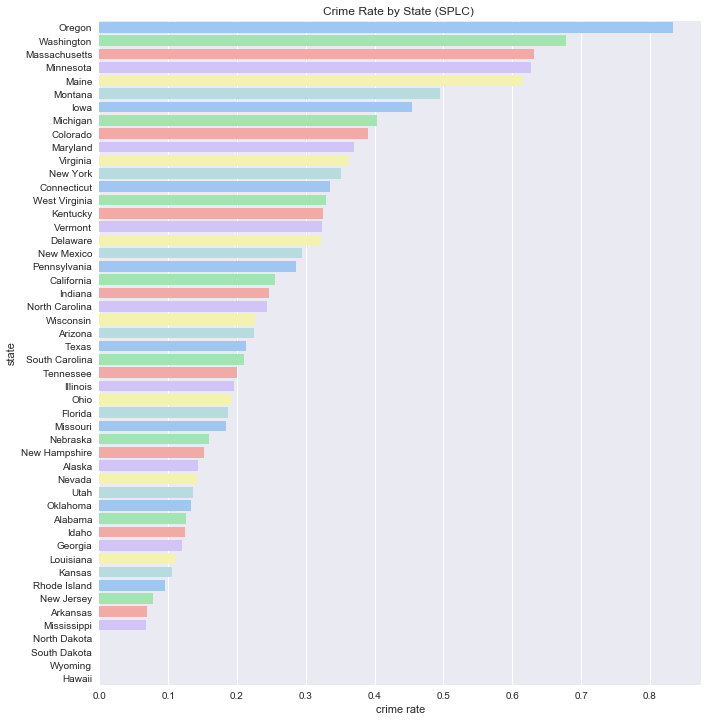

ValueError: Could not interpret input 'time'

In [135]:

state_crime1 = hate.sort_values('avg_hatecrimes_per_100k_fbi',ascending=False)
sns.set(style="darkgrid")
g = sns.factorplot(x="avg_hatecrimes_per_100k_fbi", y="state", hue=None, data=state_crime1,
                   size=10, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("state")
g.set_xlabels("crime rate")
plt.title('Crime Rate by State (FBI) ')
plt.show()
sns.set(style="darkgrid")

state_crime2 = hate.sort_values('hate_crimes_per_100k_splc',ascending=False)
g = sns.factorplot(x="hate_crimes_per_100k_splc", y="state", hue=None, data=state_crime2,
                   size=10, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("state")
g.set_xlabels("crime rate")
plt.title('Crime Rate by State (SPLC) ')
plt.show()



sns.set(style="darkgrid")
crime_rate3 =hate[["state", "avg_hatecrimes_per_100k_fbi", "hate_crimes_per_100k_splc"]]
g = sns.factorplot(x="state", y="avg_hatecrimes_per_100k_fbi", hue="time", data=crime_rate3,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")
plt.title('Barplot: Meal Tips by Time and Gender')
plt.show()